In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from ray.tune import ExperimentAnalysis

notebook_path = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_path, '..')))

from utils.constants import TRAIN_RESULTS_PATH
%matplotlib inline

In [3]:
rand_num = np.random.randint(6, size=10)
rand_num

array([4, 2, 1, 5, 5, 2, 5, 4, 0, 4])

In [5]:
set(np.unique(rand_num))

{0, 1, 2, 4, 5}

## Testing Stats

In [61]:
df_results6 = pd.read_csv('/home/babarali/OSKube/data/testresults/IMPALA/containers/6/tests/6/states.csv')
df_results12 = pd.read_csv("/home/babarali/OSKube/data/testresults/IMPALA/containers/12/tests/4/states.csv")
df_results18 = pd.read_csv("/home/babarali/OSKube/data/testresults/IMPALA/containers/18/tests/3/states.csv")

In [62]:
df_results18.columns

Index(['Unnamed: 0', 'action', 'num_consolidated', 'num_moves',
       'num_overloaded', 'mean_accuracy', 'num_model_switches', 'num_slav',
       'cpu_conserved_cost', 'mean_cluster_cpu_util', 'mean_cluster_mem_util',
       'oversub_cores', 'reward_sla', 'reward_accuracy', 'reward_illegal',
       'reward_consolidation', 'reward'],
      dtype='object')

In [63]:
df_results12.columns

Index(['Unnamed: 0', 'action', 'num_consolidated', 'num_moves',
       'num_overloaded', 'mean_accuracy', 'num_model_switches', 'num_slav',
       'cpu_conserved_cost', 'mean_cluster_cpu_util', 'mean_cluster_mem_util',
       'oversub_cores', 'reward_sla', 'reward_accuracy', 'reward_illegal',
       'reward_consolidation', 'reward'],
      dtype='object')

In [64]:
np.mean(df_results6['mean_accuracy']), np.mean(df_results12['mean_accuracy']), np.mean(df_results18['mean_accuracy'])

(42.366666666666696, 42.366666666666696, 41.10012063492064)

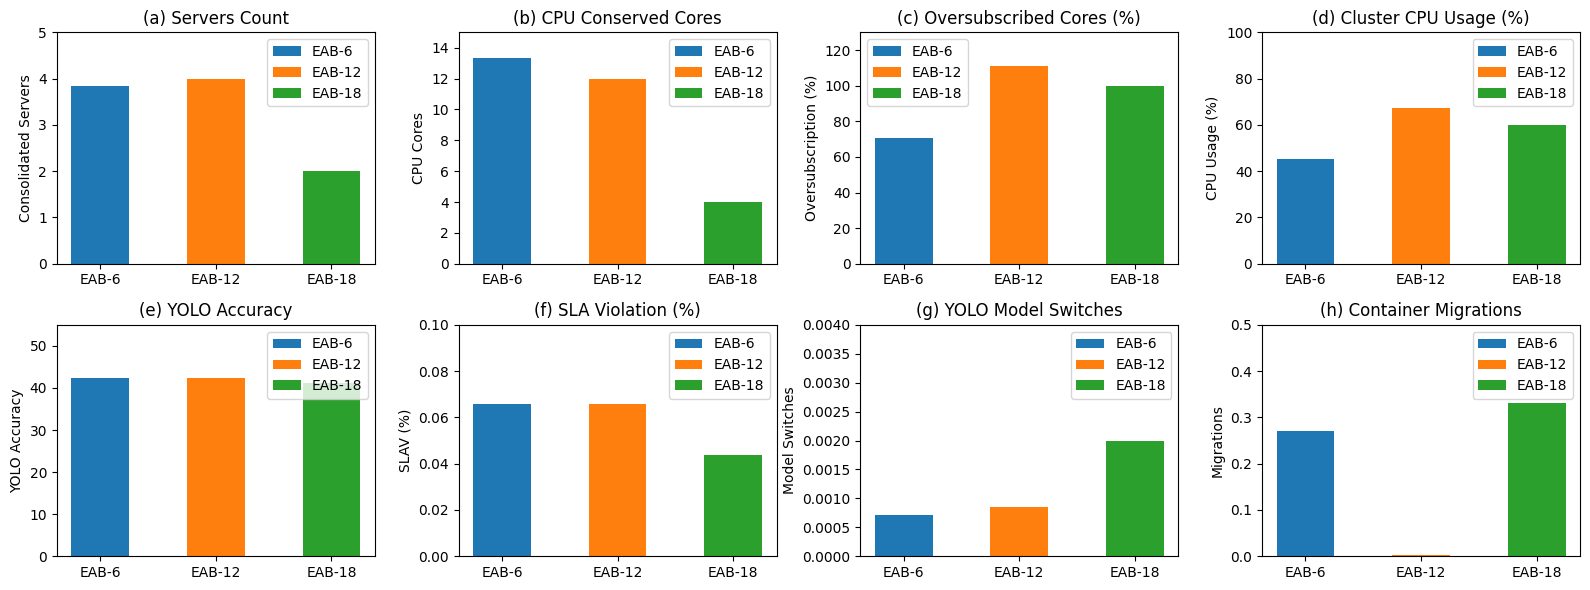

In [65]:
# Specify the columns to plot
columns_to_plot = [
    'num_consolidated', 
    'cpu_conserved_cost',
    'oversub_cores',
    'mean_cluster_cpu_util',
    'mean_accuracy',
    'num_slav',
    'num_model_switches',
    'num_moves'
]

# Create custom titles and labels
custom_titles = [
    '(a) Servers Count',
    '(b) CPU Conserved Cores',
    '(c) Oversubscribed Cores (%)',
    '(d) Cluster CPU Usage (%)',
    '(e) YOLO Accuracy',
    '(f) SLA Violation (%)',
    '(g) YOLO Model Switches',
    '(h) Container Migrations'
]

custom_y_labels = [
    'Consolidated Servers',
    'CPU Cores',
    'Oversubscription (%)',
    'CPU Usage (%)',
    'YOLO Accuracy',
    'SLAV (%)',
    'Model Switches',
    'Migrations'
]

custom_y_limits = [
    (0, 5),    # For 'num_consolidated'
    (0,15),     # For 'cpu_conserved_cost'
    (0, 130),    # For 'oversub_cores'
    (0, 100),    # For 'mean_cluster_cpu_util'
    (0, 55),    # For 'mean_accuracy'
    (0, 0.1),    # For 'num_slav'
    (0, 0.004),     # For 'num_model_switches'
    (0, 0.5)      # For 'num_moves'
]

custom_x_labels = [
    'EAB-6',
    'EAB-12',
    'EAB-18'
]

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 6))  # 2 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

columns_to_multiply = ['oversub_cores', 'mean_cluster_cpu_util', 'num_slav']

for i, column in enumerate(columns_to_plot):
    # Create bar positions
    x = range(3)  # Only 3 DataFrames
    bar_width = 0.5
    
    # Calculate the mean values, multiplying by 100 where necessary
    mean_value_6 = np.mean(df_results6[column]) * (100 if column in columns_to_multiply else 1)
    mean_value_12 = np.mean(df_results12[column]) * (100 if column in columns_to_multiply else 1)
    mean_value_18 = np.mean(df_results18[column]) * (100 if column in columns_to_multiply else 1)
    
    # Plot bars for each DataFrame
    axes[i].bar(0, mean_value_6, width=bar_width, label='EAB-6')
    axes[i].bar(x[1], mean_value_12, width=bar_width, label='EAB-12')
    axes[i].bar(x[2], mean_value_18, width=bar_width, label='EAB-18')
    
    # Adding custom titles and labels
    axes[i].set_title(custom_titles[i])
    axes[i].set_xticks(x)  # Set x-ticks to be in the center of the grouped bars
    axes[i].set_xticklabels(custom_x_labels)  # Set x-tick labels
    axes[i].set_ylabel(custom_y_labels[i])  # Set y-axis label
    axes[i].set_ylim(custom_y_limits[i])  # Apply y-limits
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.savefig('testing_results.pdf', format='pdf')
plt.show()

In [22]:
np.random.randint(2, size=18)

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

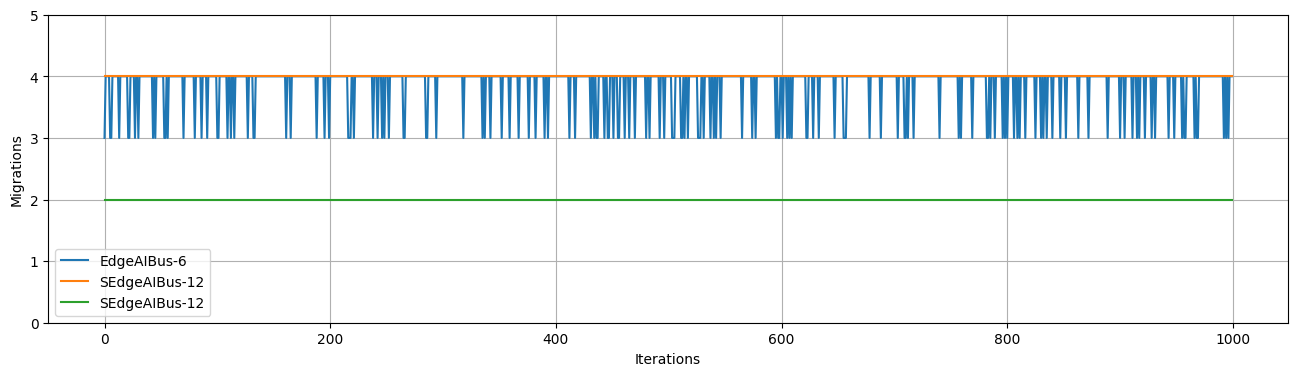

In [27]:
plt.figure(figsize=(16,4))
plt.plot(df_results6.index[:1000], df_results6['num_consolidated'][:1000], label='EdgeAIBus-6')
plt.plot(df_results12.index[:1000], df_results12['num_consolidated'][:1000], label='SEdgeAIBus-12')
plt.plot(df_results18.index[:1000], df_results18['num_consolidated'][:1000], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Migrations')
plt.legend()
plt.grid(True)
plt.ylim([0,5])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

In [28]:
np.sum(df_results6['num_moves'])/7000, np.sum(df_results12['num_moves']), np.sum(df_results18['num_moves'])

(0.27385714285714285, 19, 2340)

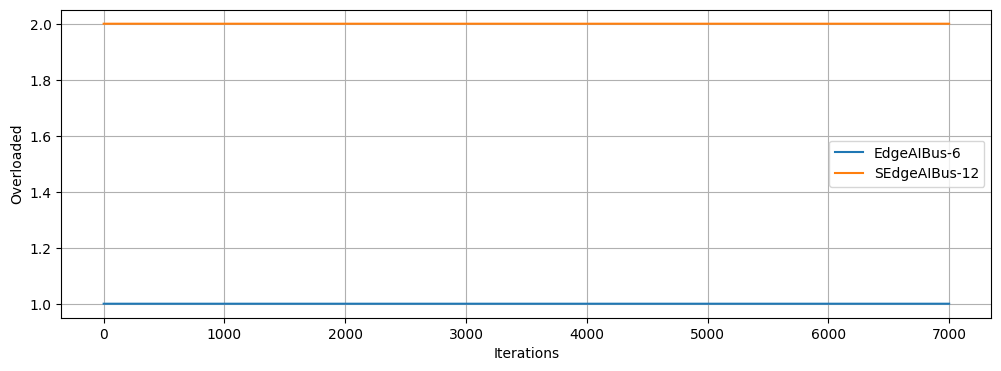

In [29]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['num_overloaded'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['num_overloaded'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
#plt.ylim([0,10])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

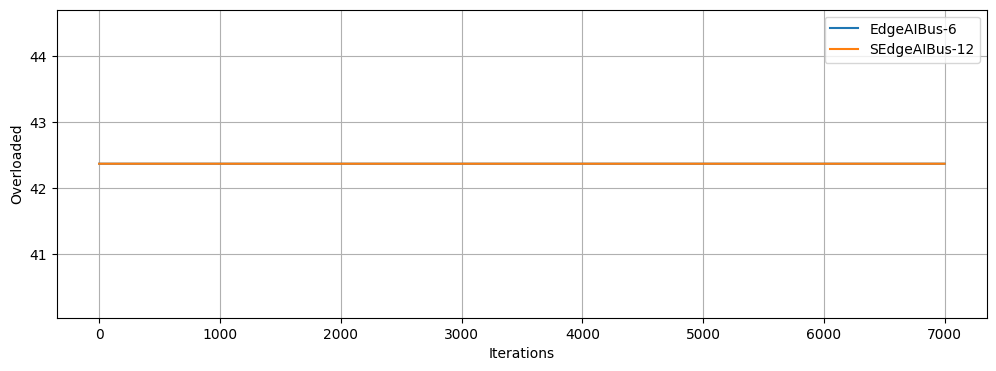

In [30]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['mean_accuracy'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['mean_accuracy'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
#plt.ylim([0,10])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

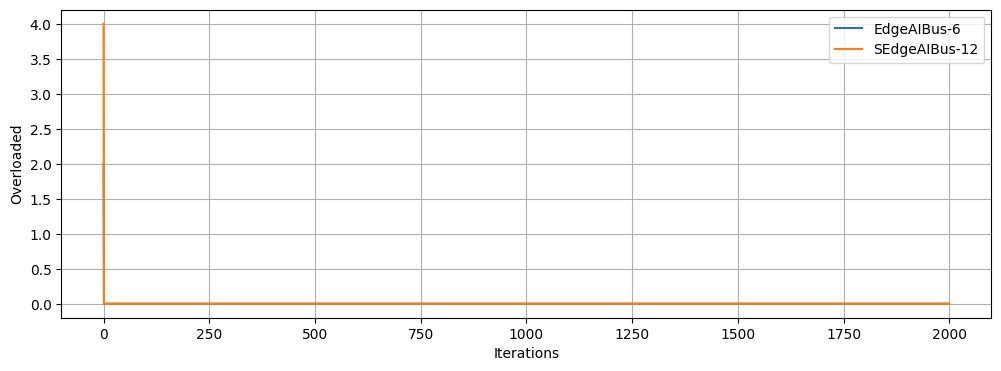

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['num_model_switches'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['num_model_switches'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
#plt.ylim([0,10])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

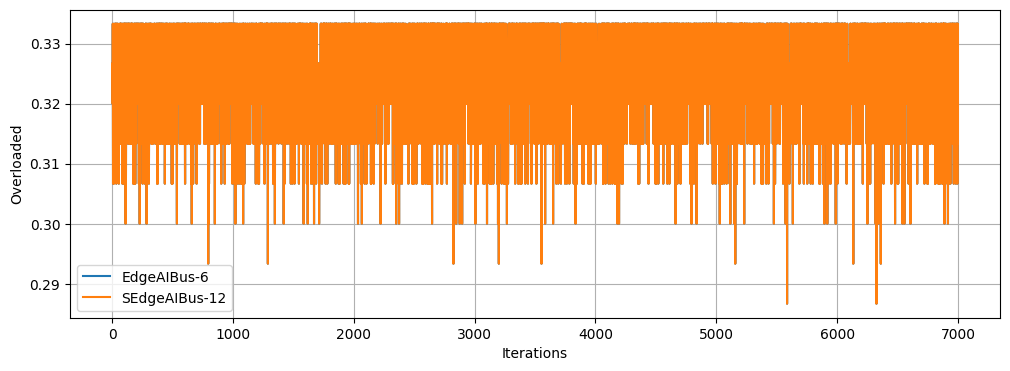

In [31]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['num_slav'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['num_slav'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
#plt.ylim([0,10])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

In [ ]:
np.mean(df_results6['num_slav'])*100, np.mean(df_results12['num_slav'])*100

(0.06699999999999938, 0.06699999999999938)

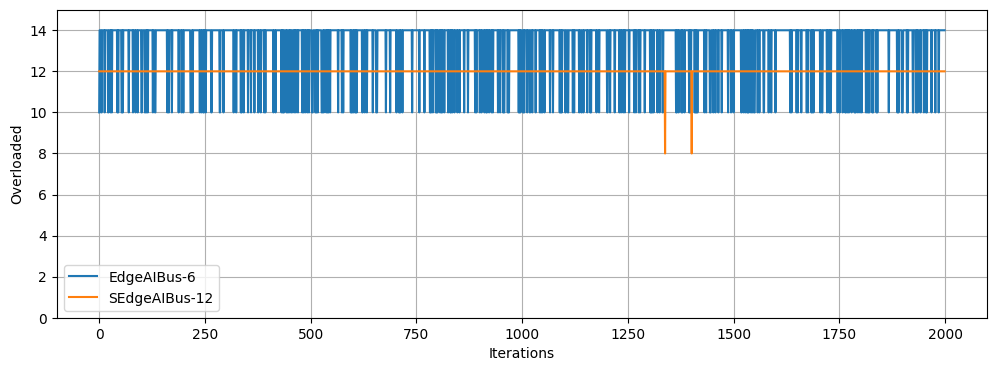

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['cpu_conserved_cost'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['cpu_conserved_cost'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
plt.ylim([0,15])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

In [ ]:
np.mean(df_results6['cpu_conserved_cost']), np.mean(df_results12['cpu_conserved_cost'])

(13.354, 11.996)

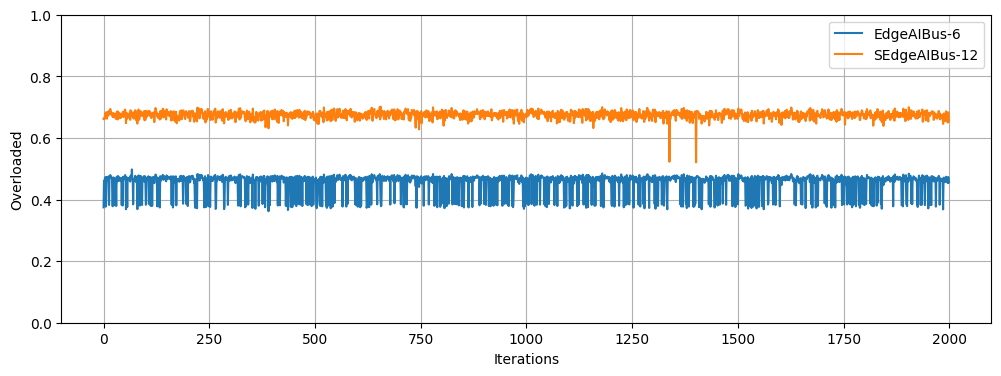

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['mean_cluster_cpu_util'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['mean_cluster_cpu_util'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
plt.ylim([0,1])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

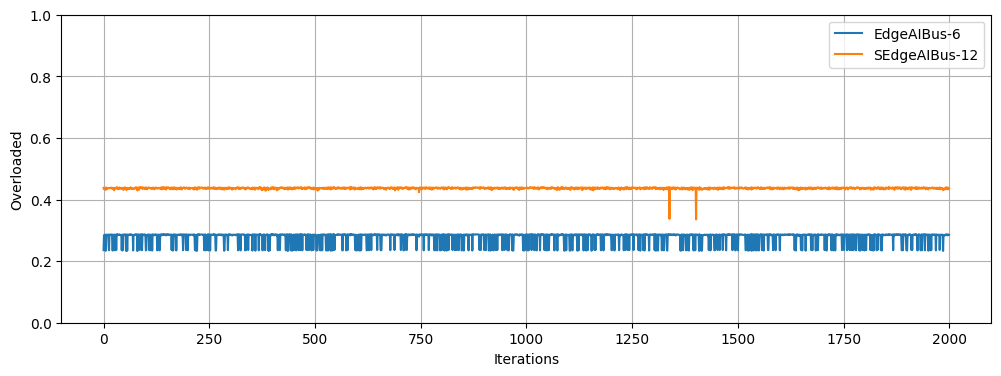

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['mean_cluster_mem_util'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['mean_cluster_mem_util'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
plt.ylim([0,1])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

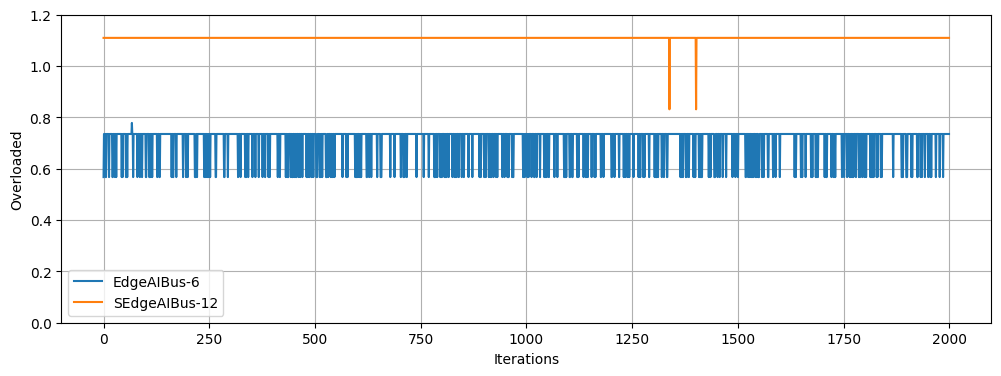

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['oversub_cores'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['oversub_cores'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
plt.ylim([0,1.2])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

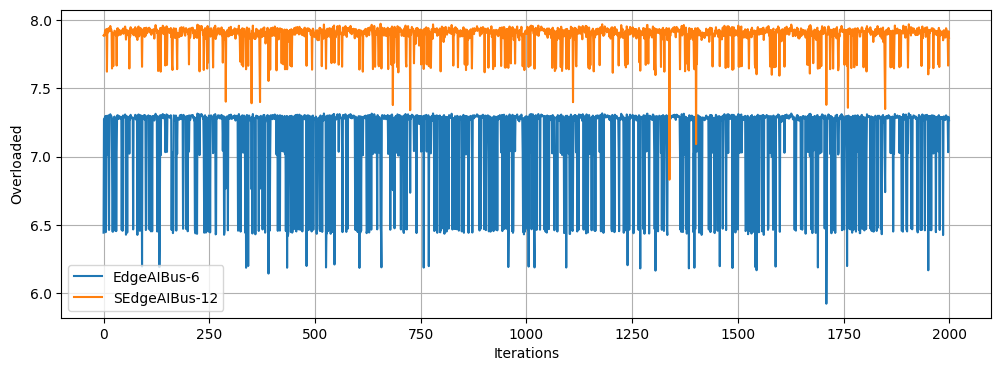

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['reward'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['reward'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
#plt.ylim([0,1.2])
#plt.savefig('cost.pdf', format='pdf')
plt.show()